# Homework 3
## M. Fernandez, T. Kreienkamp & J.Verdu

###Data
The data we are going to analyse comes from EUR-Lex (http://eur-lex.europa.eu/homepage.html), a site where EU law and other public EU documents can be found. For the extration of the data we decided to take al the legislation documents from 2005 to 2015. Moreover the word "palestine" should be found in the search. 

###Objective
This code is going to use LSA to look for similarity between documents. Finally we are going to compare the results with some of the results from last weeks HW with dictionary methods.

###Coding
First step we need to do is to do the TF-IDF score of all the unique terms in all of our documents, that will be the term-document matrix. This part is implemented in py previous code. We'll directly import the term-document matrix with the scores of all words in all of our documents.

In [10]:
from __future__ import division
import pandas as pd   
from sklearn.metrics.pairwise import cosine_similarity
# Import data
X = pd.read_table("X_Matrix.CSV",encoding="utf-8") 

len(X.T)

171

Once we have our term-document matrix we need to compute the SVD transformation of the X matrix:

In [2]:

import numpy as np

U, S, V = np.linalg.svd(X, full_matrices=False)

# look for the percentage of explained variance.

singlevalues=[]
for ss in S:
    singlevalues.append(np.power(ss,2))

NormSV =[] 
for ss in singlevalues:
    NormSV.append(ss/sum(singlevalues))
    
cumSV=[]
cumSV.append(NormSV[0])
for i in range(2,170):
    cumSV.append(sum(NormSV[0:i]))    



[0.54235529045254982,
 0.64225705837050495,
 0.69600582782336118,
 0.73821074286093324,
 0.77664127589309928,
 0.81365844976732182,
 0.84779291161889159,
 0.87007290408946636,
 0.88299690818077747,
 0.89506902012213041,
 0.90428906216773075,
 0.91249553656372473,
 0.92033430694317075,
 0.92757812465255374,
 0.93408973632190873,
 0.94043958346567946,
 0.94576099119067014,
 0.95099667412091859,
 0.95572166724831931,
 0.95984122289726304,
 0.96390155973738012,
 0.96770237795051284,
 0.9714058511596162,
 0.97456441219685708,
 0.97722101309215459,
 0.97956234039559043,
 0.98131387288657479,
 0.98305769299205892,
 0.98473252000212308,
 0.98617510405874065,
 0.98723363472672621,
 0.9882295497381276,
 0.98920619450110436,
 0.99014533262818827,
 0.99100889209798859,
 0.99165632742824339,
 0.99223432754301188,
 0.99276492517757353,
 0.99326848553154445,
 0.99371348216011102,
 0.99415578439235841,
 0.99455342795306556,
 0.99489043321519044,
 0.99521297058168012,
 0.9955009496929772,
 0.9957631867

To know how many single values we need to keep we are going to plot the percentage of variance explained:

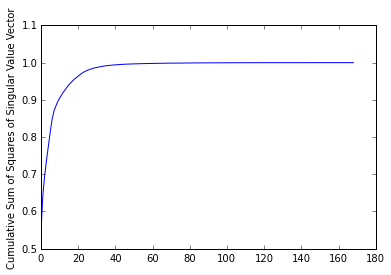

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(cumSV)
plt.ylabel('Cumulative Sum of Squares of Singular Value Vector')
plt.show()


We can see that with 20 single values we would have almost all of the variance explained. With about 10 single values we would have already 90% of the variance. For the rest of the exercice we are going only to keep 10 single values.

In [4]:

#Element 17th is the first one to contain 99% of the variance:
k=10
U_k = U[:, :k]
sigma = np.diag(S[:k])
V_k = V[:k, :]
X_k = np.dot(U_k, np.dot(sigma,V_k))

One we have our need term-document matrix we need to compute the cosine similarity of both of the term-document matrices:

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
cs=cosine_similarity(X.T)
cs_k=cosine_similarity(X_k.T)

Once we have the 
